<a href="https://www.kaggle.com/code/sk0903273/telecom-churn-dataset-best-accuracy?scriptVersionId=196664286" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-dataset/telecom_churn.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/telecom-churn-dataset/telecom_churn.csv")
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [4]:
df.shape

(243553, 14)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,243553.0,NaN,NaN,NaN,121777.0,70307.839393,1.0,60889.0,121777.0,182665.0,243553.0
telecom_partner,243553,4,Reliance Jio,61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,243553,2,M,145977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,243553.0,NaN,NaN,NaN,46.077609,16.444029,18.0,32.0,46.0,60.0,74.0
state,243553,28,Uttarakhand,8856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,243553,6,Chennai,40749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pincode,243553.0,NaN,NaN,NaN,549501.270541,259808.860574,100006.0,324586.0,548112.0,774994.0,999987.0
date_of_registration,243553,1220,2023-05-02,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_dependents,243553.0,NaN,NaN,NaN,1.9975,1.414941,0.0,1.0,2.0,3.0,4.0
estimated_salary,243553.0,NaN,NaN,NaN,85021.137839,37508.963233,20000.0,52585.0,84990.0,117488.0,149999.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [7]:
df.isna().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
from datetime import datetime
current_year=datetime.now().year
df['old']=current_year-df['date_of_registration'].str.split('-').str[0].astype(int)

In [10]:
drop_column_list=['customer_id','pincode','date_of_registration','data_used']
df.drop(drop_column_list,axis=1,inplace=True)

In [11]:
categorical_columns= [feature for feature in df.columns if df[feature].dtype=='O']
numerical_columns= [feature for feature in df.columns if df[feature].dtype!='O']

In [12]:
categorical_columns

['telecom_partner', 'gender', 'state', 'city']

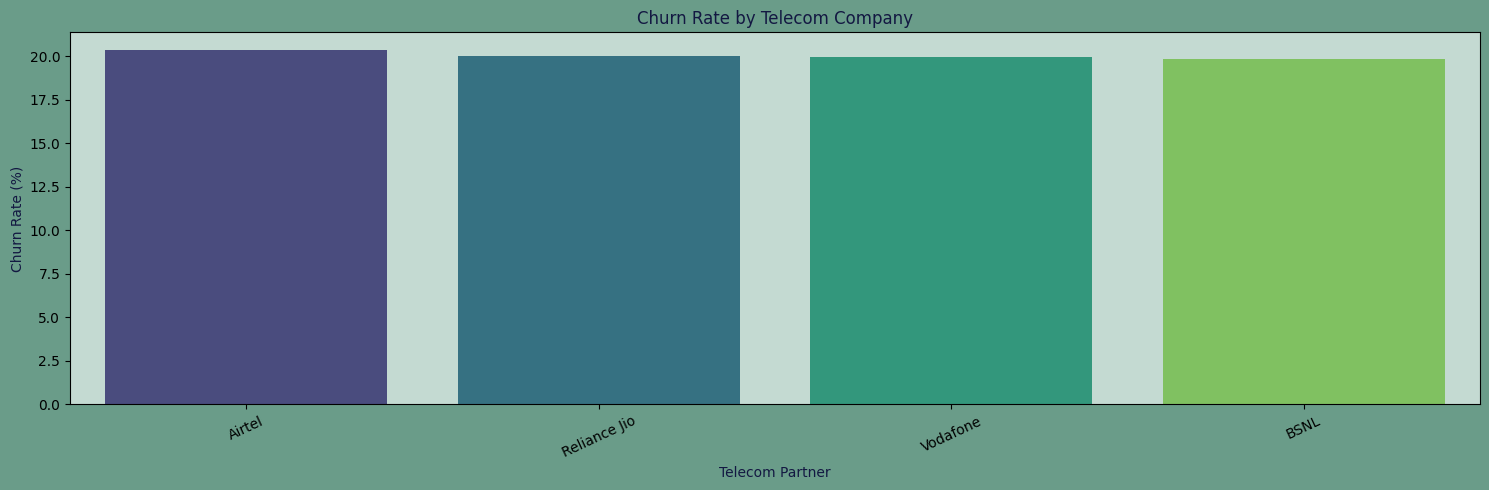

In [13]:
churn_rate_vs_telecom_comp=df.groupby('telecom_partner')['churn'].mean()*100
churn_rate_vs_telecom_comp=churn_rate_vs_telecom_comp.sort_values(ascending=False)
plt.figure(figsize=(15, 5),facecolor='#6A9C89')
ax=sns.barplot(x=churn_rate_vs_telecom_comp.index, y=churn_rate_vs_telecom_comp.values, palette="viridis")
ax.set_facecolor('#C4DAD2')
ax.set_title('Churn Rate by Telecom Company',color='#131842')
ax.set_xlabel('Telecom Partner',color='#131842')
ax.set_ylabel('Churn Rate (%)',color='#131842')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

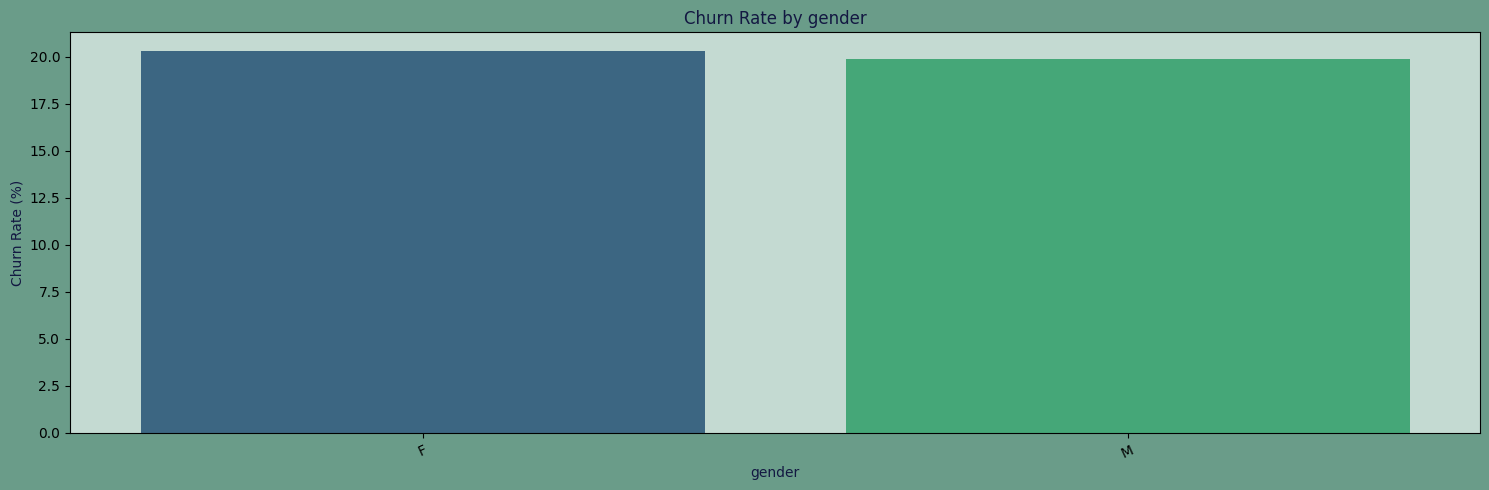

In [14]:
churn_rate_vs_gender = df.groupby('gender')['churn'].mean() * 100
churn_rate_vs_gender = churn_rate_vs_gender.sort_values(ascending=False)
plt.figure(figsize=(15, 5),facecolor='#6A9C89')
ax=sns.barplot(x=churn_rate_vs_gender.index, y=churn_rate_vs_gender.values, palette="viridis")
ax.set_facecolor('#C4DAD2')
ax.set_title('Churn Rate by gender', color='#131842')
ax.set_xlabel('gender', color='#131842')
ax.set_ylabel('Churn Rate (%)', color='#131842')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

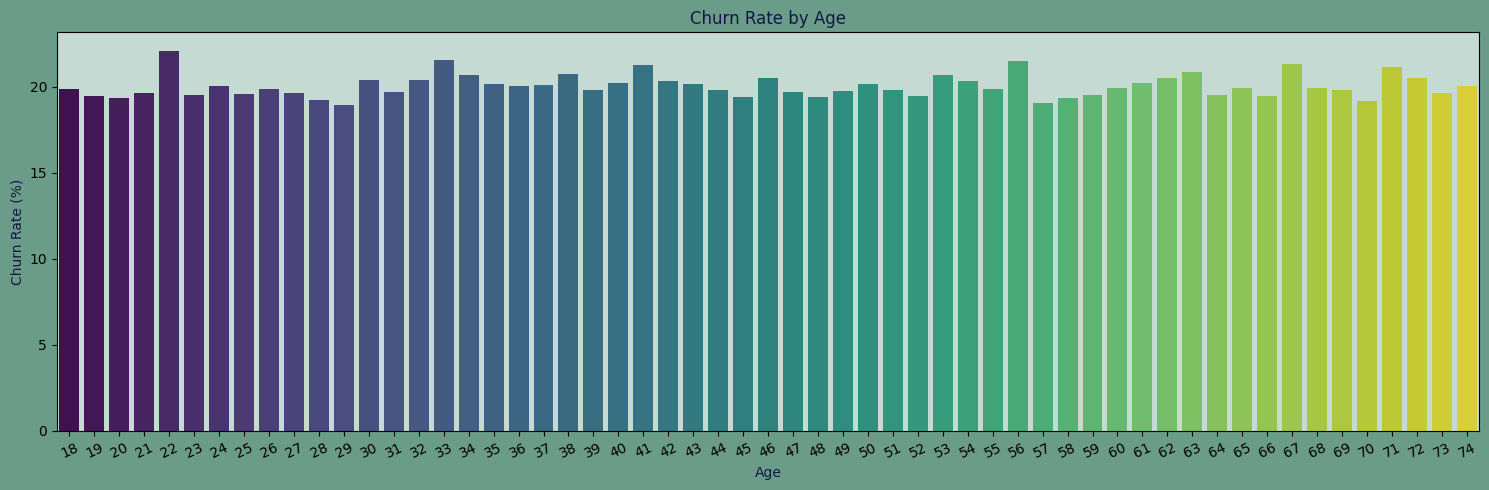

In [15]:
churn_rate_vs_age = df.groupby('age')['churn'].mean() * 100
churn_rate_vs_age = churn_rate_vs_age.sort_values(ascending=False)
plt.figure(figsize=(15, 5),facecolor='#6A9C89')
ax=sns.barplot(x=churn_rate_vs_age.index, y=churn_rate_vs_age.values, palette="viridis")
ax.set_facecolor('#C4DAD2')
ax.set_title('Churn Rate by Age', color='#131842')
ax.set_xlabel('Age', color='#131842')
ax.set_ylabel('Churn Rate (%)', color='#131842')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

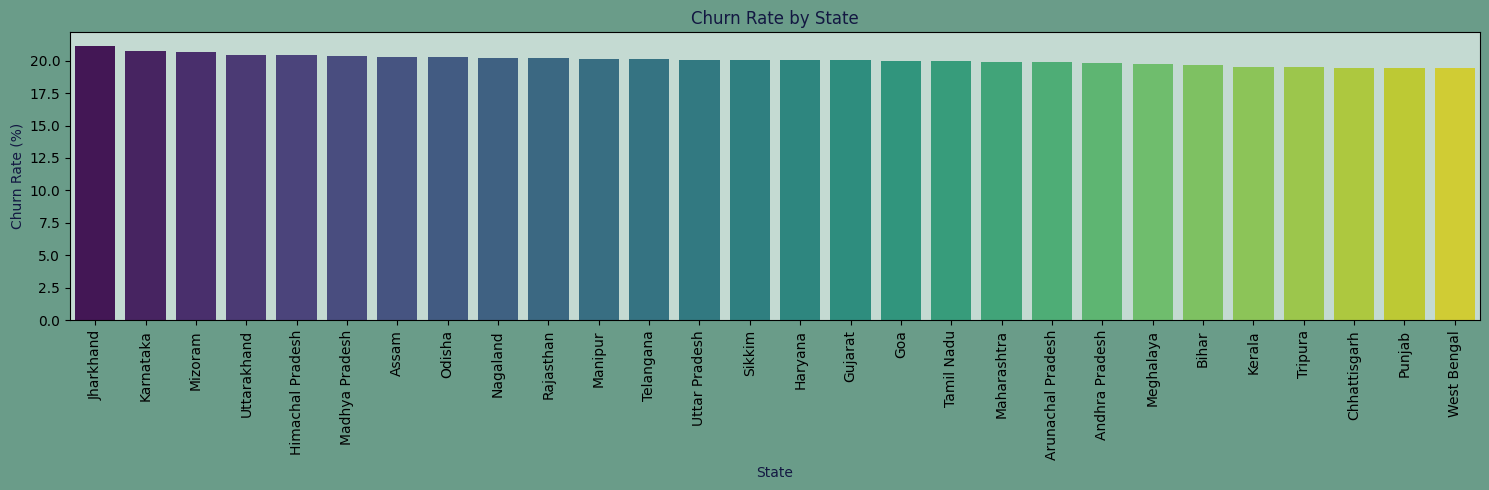

In [16]:
churn_rate_vs_state = df.groupby('state')['churn'].mean() * 100
churn_rate_vs_state = churn_rate_vs_state.sort_values(ascending=False)
plt.figure(figsize=(15, 5),facecolor='#6A9C89')
ax=sns.barplot(x=churn_rate_vs_state.index, y=churn_rate_vs_state.values, palette="viridis")
ax.set_facecolor('#C4DAD2')
ax.set_title('Churn Rate by State', color='#131842')
ax.set_xlabel('State', color='#131842')
ax.set_ylabel('Churn Rate (%)', color='#131842')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

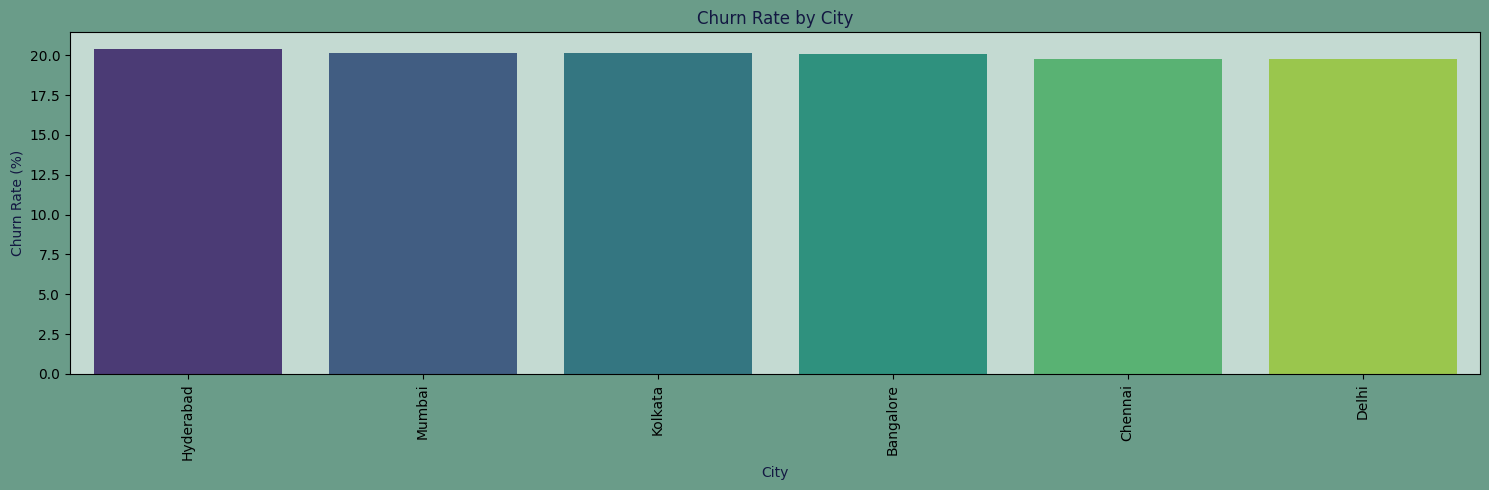

In [17]:
churn_rate_vs_city = df.groupby('city')['churn'].mean() * 100
churn_rate_vs_city = churn_rate_vs_city.sort_values(ascending=False)
plt.figure(figsize=(15, 5),facecolor='#6A9C89')
ax=sns.barplot(x=churn_rate_vs_city.index, y=churn_rate_vs_city.values, palette="viridis")
ax.set_facecolor('#C4DAD2')
ax.set_title('Churn Rate by City', color='#131842')
ax.set_xlabel('City', color='#131842')
ax.set_ylabel('Churn Rate (%)', color='#131842')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

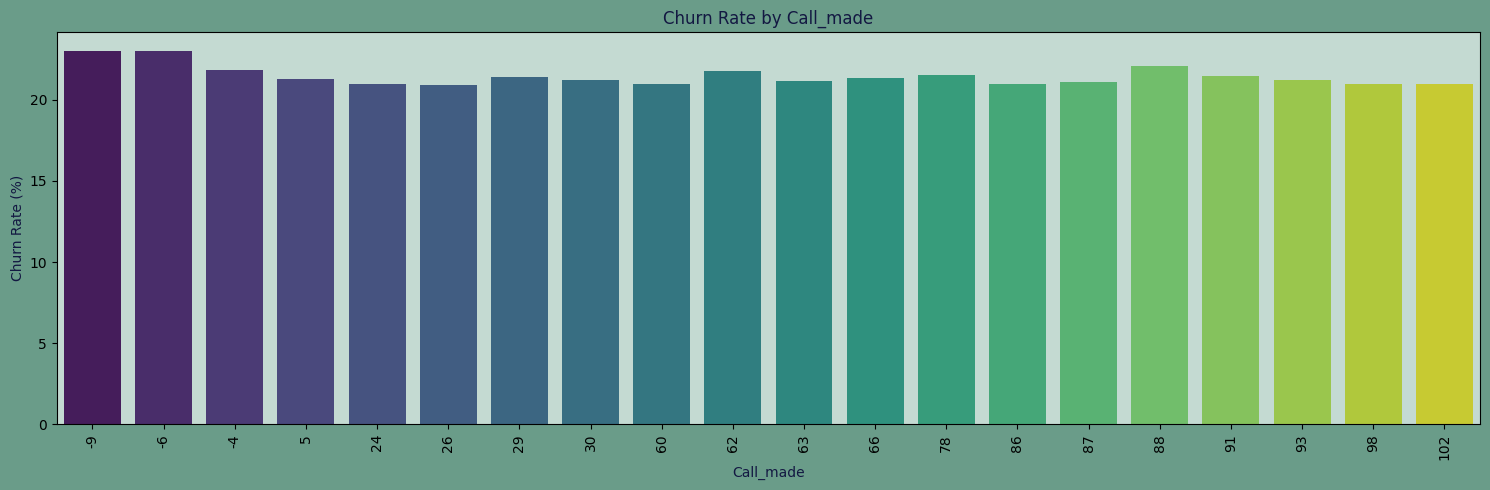

In [18]:
churn_rate_vs_call_made = df.groupby('calls_made')['churn'].mean() * 100
churn_rate_vs_call_made = churn_rate_vs_call_made.sort_values(ascending=False)
churn_rate_vs_call_made=churn_rate_vs_call_made.iloc[0:20]
churn_rate_vs_call_made
plt.figure(figsize=(15, 5),facecolor='#6A9C89')
ax=sns.barplot(x=churn_rate_vs_call_made.index, y=churn_rate_vs_call_made.values, palette="viridis")
ax.set_facecolor('#C4DAD2')
ax.set_title('Churn Rate by Call_made', color='#131842')
ax.set_xlabel('Call_made', color='#131842')
ax.set_ylabel('Churn Rate (%)', color='#131842')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
df.head(10)

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,churn,old
0,Reliance Jio,F,25,Karnataka,Kolkata,4,124962,44,45,0,4
1,Reliance Jio,F,55,Mizoram,Mumbai,2,130556,62,39,0,4
2,Vodafone,F,57,Arunachal Pradesh,Delhi,0,148828,49,24,1,4
3,BSNL,M,46,Tamil Nadu,Kolkata,1,38722,80,25,1,4
4,BSNL,F,26,Tripura,Delhi,2,55098,78,15,0,4
5,Vodafone,M,36,Uttarakhand,Chennai,1,73452,91,24,0,4
6,BSNL,F,60,Karnataka,Delhi,1,110035,36,13,0,4
7,BSNL,M,46,Arunachal Pradesh,Kolkata,4,104541,87,40,1,4
8,Reliance Jio,F,53,Himachal Pradesh,Mumbai,2,79439,34,12,0,4
9,BSNL,F,57,Rajasthan,Mumbai,0,126422,61,33,0,4


In [20]:
numeric_df = df.select_dtypes(include=['int64'])

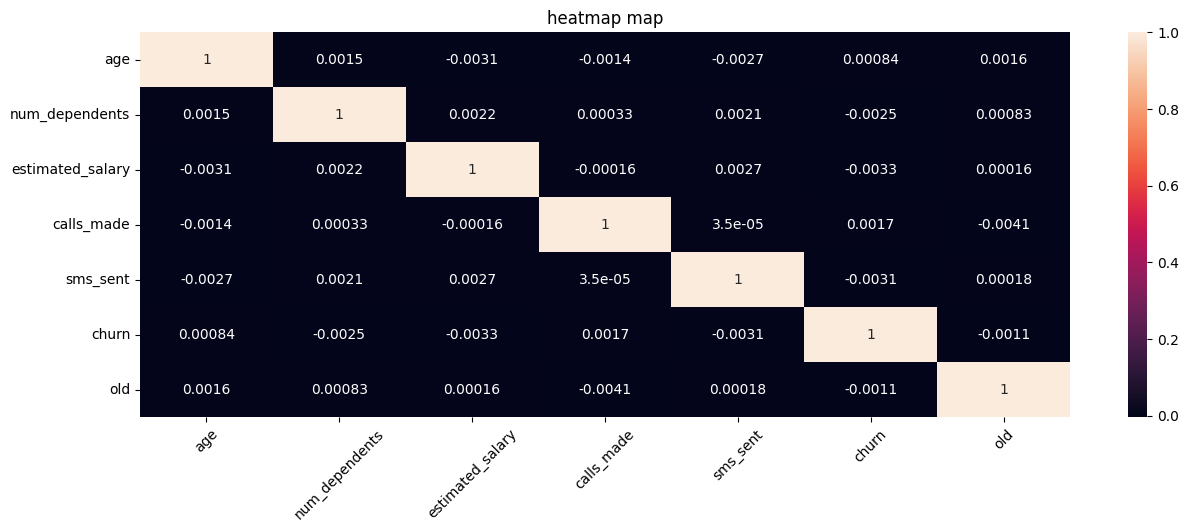

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("heatmap map")
plt.xticks(rotation=45)
plt.show()

In [22]:
df['churn'].value_counts()

churn
0    194726
1     48827
Name: count, dtype: int64

In [23]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=encode.fit_transform(df[col])

In [24]:
x=df.drop('churn',axis=1)
y=df['churn']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_train_scaled=scale.fit_transform(x_train_smote)
x_test_scaled=scale.transform(x_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [36]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

In [37]:
accuracy_results = {}

In [38]:
from tqdm import tqdm

In [39]:
for model_name, model in tqdm(models.items(), desc="Fitting models"):
    model.fit(x_train_scaled,y_train_smote)
    y_test_pred=model.predict(x_test_scaled)
    acc=accuracy_score(y_test,y_test_pred)
    accuracy_results[model_name] = acc

Fitting models: 100%|██████████| 3/3 [01:30<00:00, 30.24s/it]


In [40]:
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name}: {accuracy:.4f}')

Logistic Regression: 0.5761
Random Forest: 0.6483
Naive Bayes: 0.5930
